# Cleaning and EDA: Pew Data

In this notebook, I cleaned and formatted the Pew dataset so it was ready for modeling. I also did some light EDA to see how the features interacted with the target variable. 

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pew = pd.read_csv('../data/pew.txt')
print(pew.shape)
pew.head()

(4708, 159)


,QKEY,INTERVIEW_START_W69,INTERVIEW_END_W69,DEVICE_TYPE_W69,LANG_W69,FORM_W69,SATIS_W69,POL1DT_W69,POL1DTSTR_W69,FUTGEN_W69,...,POL1DTSTR_W64,DEMFIELD_W59,TRUMPDEM2020_W59,DEM1_CODE_FINAL_W59,COVID_DEATHS_CNTY_W69,BATTLE_NARROW_W69,WEIGHT_W69_CENSUS,WEIGHT_W59_W69,WEIGHT_W64_W69,WEIGHT_W69
0,100260,2020-6-17 16:20:46.000,2020-6-17 16:36:5.000,3,1,2,2,1,1,1,...,1,,1,,2,1,0.725967,0.6272713320551427,0.617936009359436,0.731921
1,100637,2020-6-18 14:48:14.000,2020-6-18 15:3:26.000,1,1,2,2,1,1,1,...,1,,1,,2,3,1.349430,0.6754638453876008,0.707802384563748,0.762127
2,101472,2020-6-19 10:45:50.000,2020-6-19 10:55:23.000,2,1,1,2,2,1,3,...,1,,5,,2,4,1.746954,1.6850284516246583,1.7612633160818703,2.052434
3,101493,2020-6-17 10:48:28.000,2020-6-17 12:33:47.000,2,1,2,2,1,1,2,...,1,,1,,1,1,0.800370,0.8668663802477705,0.9633645897670713,0.932218
4,103094,2020-6-17 18:27:16.000,2020-6-19 14:14:5.000,2,1,1,2,99,,3,...,1,3,,99,2,3,2.439017,3.163657274096003,2.894057482548047,3.146019


Here, I selected all of the columns starting with `'F_'` because, according to the [data dictionary], these are the demographic columns and therefore the columns I will focus on for my project.

In [3]:
demo_cols = pew.loc[:,pew.columns.str.startswith('F_')].columns
demo_cols = [col for col in demo_cols if col not in ['F_EDUCCAT', 'F_RACETHNMOD', 'F_BORN', 'F_INCOME_RECODE',
                'F_VOLSUM','F_HISP_ORIGIN','F_PARTYLN_FINAL']]
df = pew.loc[:, demo_cols]
print(df.shape)
df.head()

(4708, 22)


,F_METRO,F_CREGION,F_CDIVISION,F_AGECAT,F_SEX,F_EDUCCAT2,F_HISP,F_RACECMB,F_CITIZEN,F_NATIVITY2,...,F_ATTEND,F_PARTY_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_REG,F_IDEO,F_ACSWEB,F_INC_TIER2,F_YEARSINUS,F_PARTYSUMIDEO
0,1,4,9,4,1,5,2,1,1,1,...,5,1,1,6,1,1,1,2,1,1
1,1,3,5,3,2,4,2,1,1,1,...,3,3,1,4,1,2,1,2,1,1
2,1,3,7,2,1,6,2,1,1,1,...,5,3,1,7,3,3,2,3,1,2
3,1,4,9,3,1,3,1,1,1,1,...,6,1,1,6,1,2,1,2,1,1
4,1,1,2,2,2,2,99,99,99,1,...,99,4,2,2,,99,1,99,1,9


## Mapping and renaming

Now that I have those selected, I'm going to go through and map all of the values in those columns to either my preferred numerical order (i.e. 0 and 1 instead of 1 and 2) or to the strings corresponding with each value so that I can dummy these columns later and maintain some interpretability. In a few cases, I mapped certain values to `'111_other'` or `'111_refused'` so that those would be the columns dropped in the dummying process. I also added a few comments to explain what the values mean but please check out the README for more easily interpretable explanations.

In [4]:
# mapping dicts

f_metro = {1: 1, 2: 0}
f_cregion = {1: 'northeast',2: 'midwest', 3: 'south', 4: 'west'}
f_cdivision = {1: 'new_england', 2: 'mid_atlantic', 3: 'east_north_central', 4: 'west_north_central',
             5: 'south_atlantic', 6: 'east_south_central', 7: 'west_south_central', 8: 'mountain', 9: 'pacific'}
f_agecat = {1: 1., 2: 2., 3: 3., 4: 4., 99: np.nan} # 1 = 18-29, 2 = 30-49, 3 = 50-64, 4 = 65+
f_sex = {1: 0, 2: 1, 99: np.nan}
f_educcat2 = {i: i for i in range(1,15)} # 1 = less than highschool, 14 = doctorate
f_educcat2[99] = np.nan
f_hisp = {1: 1, 2: 0, 99: np.nan}
f_racecmb = {1: 'white', 2: 'black', 3: 'asian', 4: 'mixed', 5: 'other', 99: '111_refused'}
f_citizen = {1: 1, 2: 0}
f_nativity2 = {1: 'usa', 2: 'puerto_rico', 3: 'us_territory', 4: 'cuba', 5: 'mexico', 99: '111_refused'}
f_marital = {1: 'married', 2: 'live_w_partner', 3: 'divorced', 4: 'separated', 5: 'widowed', 6: 'single'}
f_relig = {1:'protestant',2:'catholic',3:'mormon',4:'orthodox',5:'jewish',6:'muslim',7:'buddhist',8:'hindu', 
           9: 'atheist', 10: 'agnostic', 11: 'other', 12: 'none', 13: 'christian', 14: 'unitarian', 99: '111_refused'}
f_attend = {i: i for i in range(1,7)} # 1 = more than once a week, 6 = never
f_attend[99] = np.nan
f_party_final = {1: 'gop', 2: 'dem', 3: 'ind', 4: '111_other'}
f_partysum_final = {1: 'gop', 2: 'dem', 3: 'ind', 99: '111_refused'}
f_income = {i: i for i in range(1,10)} # 1 = less than $10k, 9 $150k or more 
f_income[99] = np.nan
f_reg = {'1':'registered', '2': 'prob_registered', '3': 'not_registered', '99': '111_refused', ' ': '111_refused'}
f_ideo = {i: i for i in range(1,6)} # 1 = very conservative, 5 = very liberal
f_ideo[99] = np.nan
f_acsweb = {1: 1, 2: 0}
f_inc_tier2 = {i: i for i in range(1,4)} # 1 = lower class, 3 = upper class
f_inc_tier2[99] = np.nan
f_yearsinus = {1: 4, 2: 1, 3: 2, 4: 3, 99: np.nan} # 1 = 0-10 years, 4 = born in us
f_partysumideo = {i: i  for i in range(1,5)} 
f_partysumideo[99] = np.nan # 1 = conservative gop, 2 = moderate gop, 3 = moderate dem, 4 = liberal dem

In [5]:
# applying maps and renaming columns for interpretability

col_dicts = [f_metro, f_cregion, f_cdivision, f_agecat, f_sex, f_educcat2, f_hisp, f_racecmb, f_citizen,
             f_nativity2, f_marital, f_relig, f_attend, f_party_final, f_partysum_final,
             f_income, f_reg, f_ideo, f_acsweb, f_inc_tier2, f_yearsinus, f_partysumideo]
             

new_col_names = ['lives_in_metro_area', 'large_region', 'region', 'age_group', 'is_female', 'education_level',
                'is_hispanic', 'race', 'is_citizen', 'national_origin', 'marital_status', 'religion',
                 'relig_activity','political_party', 'final_party', 'income_bracket', 'voter_status',
                 'ideology','internet_access', 'class', 'years_in_usa', 'party_and_ideo']

try:
    df.drop(columns = cols_to_drop, inplace=True)
except:
    pass

for c, d in zip(df.columns, col_dicts):
    df[c] = df[c].map(d)
    
df.columns = new_col_names
df.head()


,lives_in_metro_area,large_region,region,age_group,is_female,education_level,is_hispanic,race,is_citizen,national_origin,...,relig_activity,political_party,final_party,income_bracket,voter_status,ideology,internet_access,class,years_in_usa,party_and_ideo
0,1,west,pacific,4.0,0.0,5.0,0.0,white,1.0,usa,...,5.0,gop,gop,6.0,registered,1.0,1,2.0,4.0,1.0
1,1,south,south_atlantic,3.0,1.0,4.0,0.0,white,1.0,usa,...,3.0,ind,gop,4.0,registered,2.0,1,2.0,4.0,1.0
2,1,south,west_south_central,2.0,0.0,6.0,0.0,white,1.0,usa,...,5.0,ind,gop,7.0,not_registered,3.0,0,3.0,4.0,2.0
3,1,west,pacific,3.0,0.0,3.0,1.0,white,1.0,usa,...,6.0,gop,gop,6.0,registered,2.0,1,2.0,4.0,1.0
4,1,northeast,mid_atlantic,2.0,1.0,2.0,NaN,111_refused,NaN,usa,...,NaN,111_other,dem,2.0,111_refused,NaN,1,NaN,4.0,NaN


Out of curiosity, I'm going to add in some other columns, but I will likely drop many of them since they have a lot of null values.

In [6]:
# adding some other columns

other_cols = ['POLICE_FUND_W69','POLICEQ_IMMUNITY_W69','SATIS_W69','FUTGEN_W69',
              'FEEL_COUNTRY_ANGRY_W69','FEEL_COUNTRY_FEAR_W69','FEEL_COUNTRY_HOPEFUL_W69',
              'FEEL_COUNTRY_PROUD_W69','ECON1_W69', 'ECON1B_W69',
              'PRESGOODBIDEN_W69', 'C_MASKREACT_W69','C_SHOULDMASK_W69','GOVNEEDY_W69',
              'EXCPWER_W69','SNSUSE_W69']
                    
police_fund = {i: i  for i in range(1,6)} # budget should be 1 = increased a lot, 5 = decreased a lot
police_fund[99] = np.nan  
police_immunity = {1: 0, 2: 1} # police should be held accountable
satis = {1: 1, 2: 0} # 1 = satisfied
futgen = {1: 'better_off', 2: 'worse_off', 3: 'status_quo'}
feel_country_angry = {1: 1, 2: 0} 
feel_country_fear = {1: 1, 2: 0} 
feel_country_hopeful = {1: 1, 2: 0} 
feel_country_proud = {1: 1, 2: 0} 
econ1 = {i: i  for i in range(1,5)} # 1 = excellent economy today, 4 = poor
econ1[99] = np.nan  
econ1b = {1: 'get_better', 2: 'get_worse', 3: 'stay_same'}
presgoodbiden = {i: i  for i in range(1,6)} # 1 = he'd be great president, 5 = terrible president
presgoodbiden[99] = np.nan 
c_maskreact = {1: 'approve', 2: 'disapprove', 3: 'not_care'}
c_shouldmask = {i: i  for i in range(1,6)} # 1 = always, 5 = never
c_shouldmask[99] = np.nan 
govneedy = {1: 1, 2: 0} # 1 = gov should do more for needy
excpwer = {1: 1, 2: 0} # pres should be able to act without congress or courts
snsuse = {1: 1, 2: 0} # 1 = they use social media

In [7]:
# applying maps and renaming columns for interpretability

col_dicts = [police_fund, police_immunity, satis, futgen, feel_country_angry,
             feel_country_fear, feel_country_hopeful, feel_country_proud, econ1,
             econ1b, presgoodbiden, c_maskreact, c_shouldmask,govneedy, excpwer, snsuse]

new_col_names = ['defund_support', 'police_accountability_support', 'general_satisfaction',
                 'future_generations', 'angry_abt_country','fear_abt_country',
                 'hopeful_abt_country','proud_abt_country','economy_status',
                 'economy_in_a_year', 'biden_good_pres', 'others_reaction_to_mask',
                 'should_wear_mask', 'welfare_support','executive_power', 'social_media_user']

for c, d, n in zip(other_cols, col_dicts, new_col_names):
    df[n] = pew[c].map(d)
        
df.iloc[:,20:].head()
        

,years_in_usa,party_and_ideo,defund_support,police_accountability_support,general_satisfaction,future_generations,angry_abt_country,fear_abt_country,hopeful_abt_country,proud_abt_country,economy_status,economy_in_a_year,biden_good_pres,others_reaction_to_mask,should_wear_mask,welfare_support,executive_power,social_media_user
0,4.0,1.0,3.0,0.0,0.0,better_off,1.0,0.0,1.0,1.0,2.0,get_better,5.0,approve,4.0,0.0,0.0,0.0
1,4.0,1.0,1.0,0.0,0.0,better_off,0.0,1.0,1.0,0.0,2.0,get_better,5.0,not_care,4.0,1.0,1.0,1.0
2,4.0,2.0,2.0,1.0,0.0,status_quo,0.0,0.0,1.0,1.0,2.0,stay_same,3.0,approve,2.0,1.0,0.0,1.0
3,4.0,1.0,5.0,0.0,0.0,worse_off,1.0,1.0,0.0,1.0,1.0,get_better,5.0,approve,1.0,0.0,NaN,1.0
4,4.0,NaN,4.0,1.0,0.0,status_quo,1.0,1.0,1.0,0.0,4.0,get_worse,3.0,not_care,1.0,1.0,0.0,0.0


## Accounting for null values

Now I'm going to drop columns with a significant number of null values so that there aren't as many rows with null values that I'll have to drop.

In [8]:
cols_w_nulls = list(df.loc[:,df.isnull().sum() > 20].columns)

cols_w_nulls

['age_group',
 'national_origin',
 'political_party',
 'final_party',
 'income_bracket',
 'ideology',
 'class',
 'years_in_usa',
 'party_and_ideo',
 'defund_support',
 'police_accountability_support',
 'general_satisfaction',
 'future_generations',
 'angry_abt_country',
 'fear_abt_country',
 'proud_abt_country',
 'economy_status',
 'economy_in_a_year',
 'biden_good_pres',
 'welfare_support',
 'executive_power']

There are a few columns I'd like to keep even though they have nulls (i.e. my target variable haha) so I remove those from the `cols_w_nulls` list before dropping all of those from the dataframe.

In [9]:
cols_to_keep = ['defund_support',  # target variable
                'income_bracket',  # i want to keep something related to class / wealth
                'political_party', # i also want to keep a party/ideology column
                'age_group'        # i suspect generation will be helpful and this is all i have for it
               ]

for col in cols_to_keep:
    try:
        cols_w_nulls.remove(col)
    except:
        pass
    
cols_w_nulls.append('large_region')    # having both region columns seems redundant

# these are the columns i'll have left over
[col for col in df.columns if col not in cols_w_nulls] # looks pretty good!

['lives_in_metro_area',
 'region',
 'age_group',
 'is_female',
 'education_level',
 'is_hispanic',
 'race',
 'is_citizen',
 'marital_status',
 'religion',
 'relig_activity',
 'political_party',
 'income_bracket',
 'voter_status',
 'internet_access',
 'defund_support',
 'hopeful_abt_country',
 'others_reaction_to_mask',
 'should_wear_mask',
 'social_media_user']

In [10]:
# dropping those columns with a lot of nulls and then any rows with nulls still remaining

df.drop(columns = cols_w_nulls, inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()

(4314, 20)


,lives_in_metro_area,region,age_group,is_female,education_level,is_hispanic,race,is_citizen,marital_status,religion,relig_activity,political_party,income_bracket,voter_status,internet_access,defund_support,hopeful_abt_country,others_reaction_to_mask,should_wear_mask,social_media_user
0,1,pacific,4.0,0.0,5.0,0.0,white,1.0,single,none,5.0,gop,6.0,registered,1,3.0,1.0,approve,4.0,0.0
1,1,south_atlantic,3.0,1.0,4.0,0.0,white,1.0,married,protestant,3.0,ind,4.0,registered,1,1.0,1.0,not_care,4.0,1.0
2,1,west_south_central,2.0,0.0,6.0,0.0,white,1.0,married,catholic,5.0,ind,7.0,not_registered,0,2.0,1.0,approve,2.0,1.0
3,1,pacific,3.0,0.0,3.0,1.0,white,1.0,married,agnostic,6.0,gop,6.0,registered,1,5.0,0.0,approve,1.0,1.0
5,1,mountain,3.0,0.0,5.0,0.0,white,1.0,married,catholic,5.0,ind,9.0,registered,1,3.0,0.0,approve,1.0,0.0


# EDA

## Charting relationships

I'm not sure what to expect as far as relationships with the target variable, so I'm going to create a loop to chart a ton of the relationships in one go. They won't be super interpretable without tick labels, but they'll help me get a sense of which features and specific values have relationships with support for defunding the police.

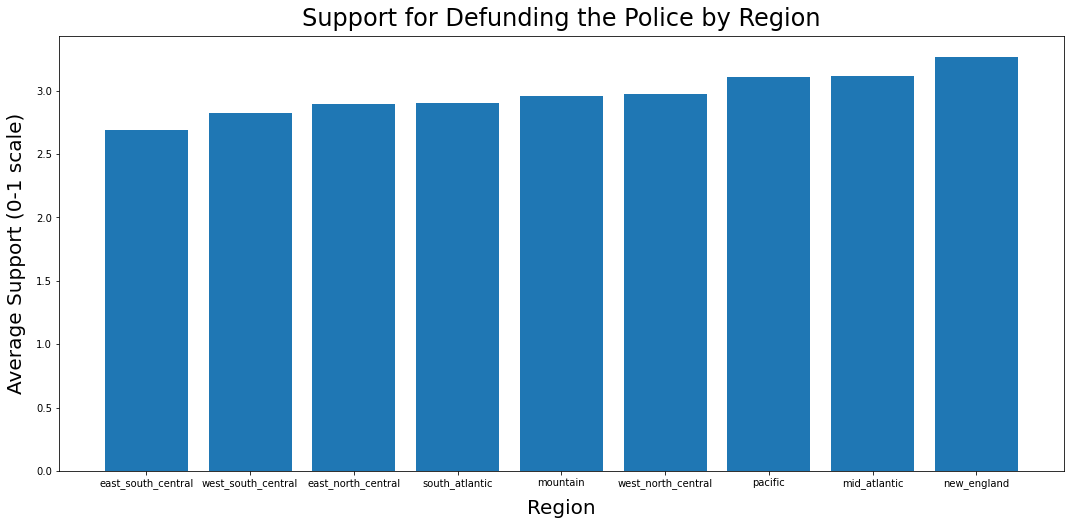

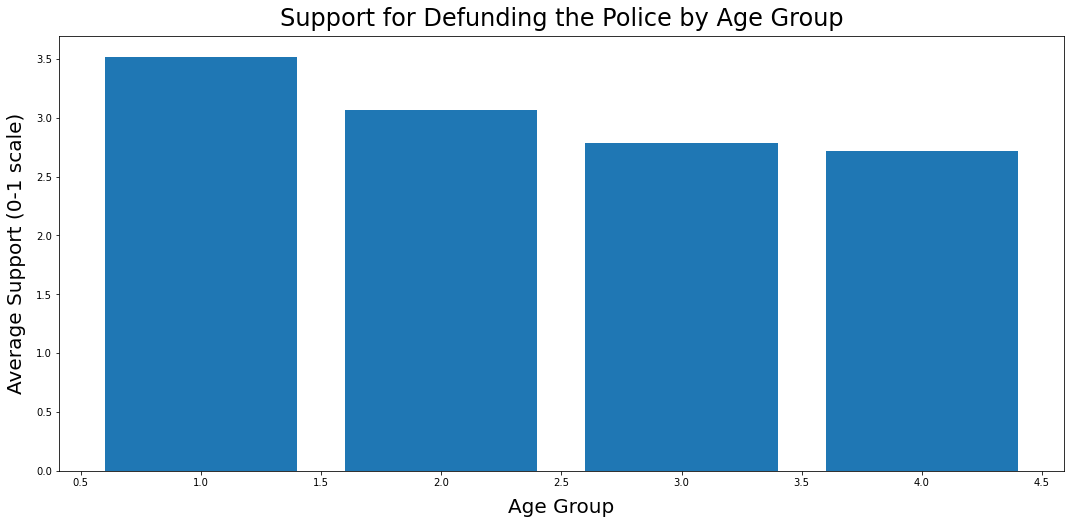

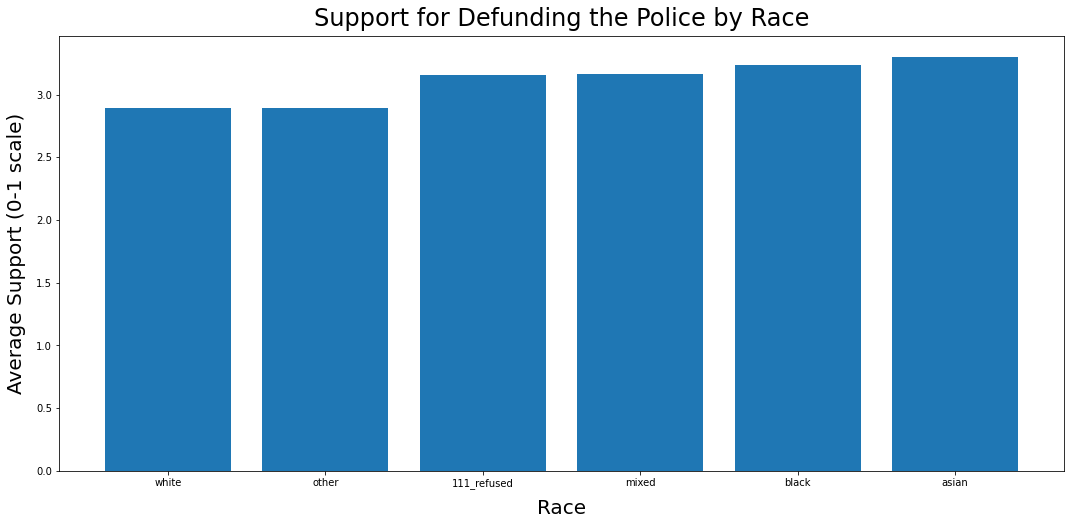

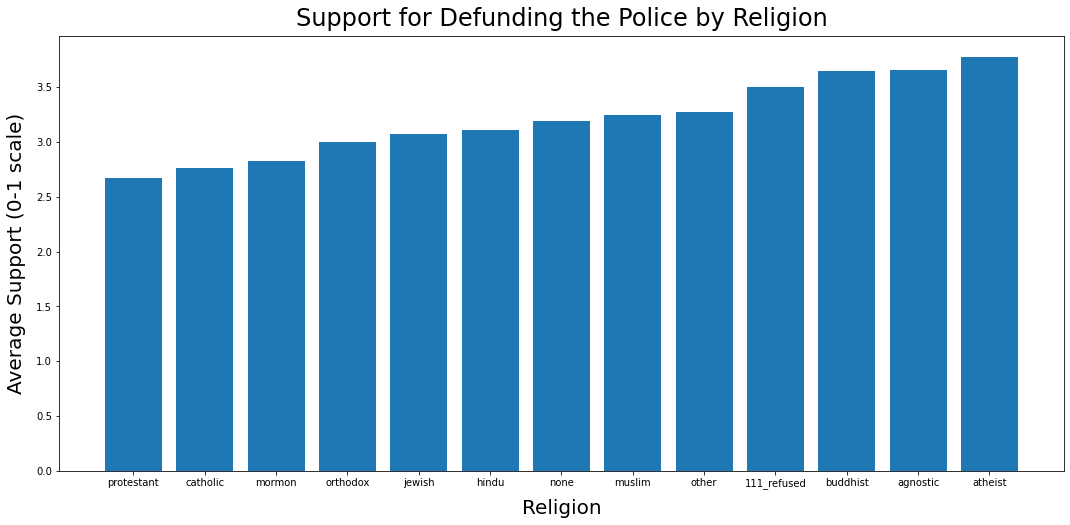

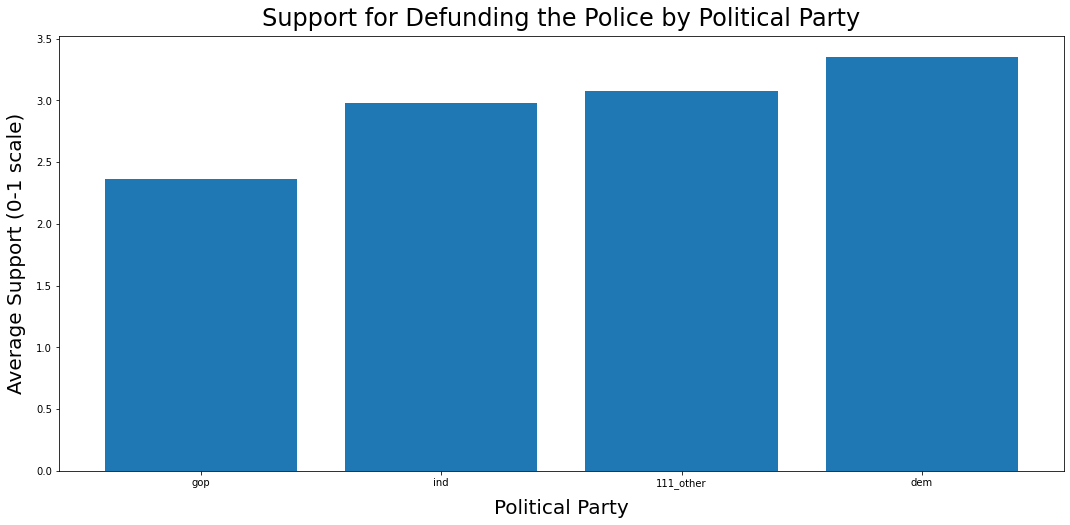

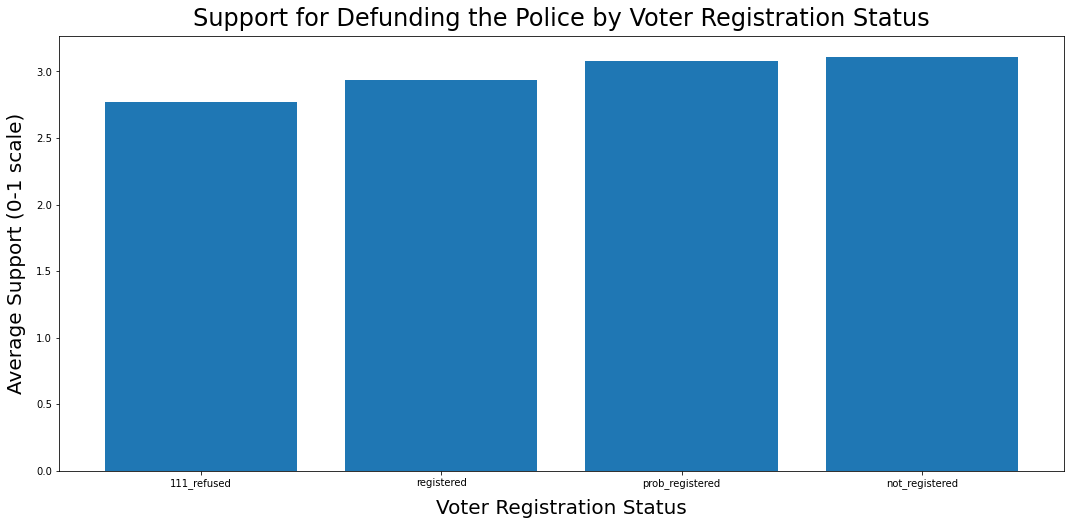

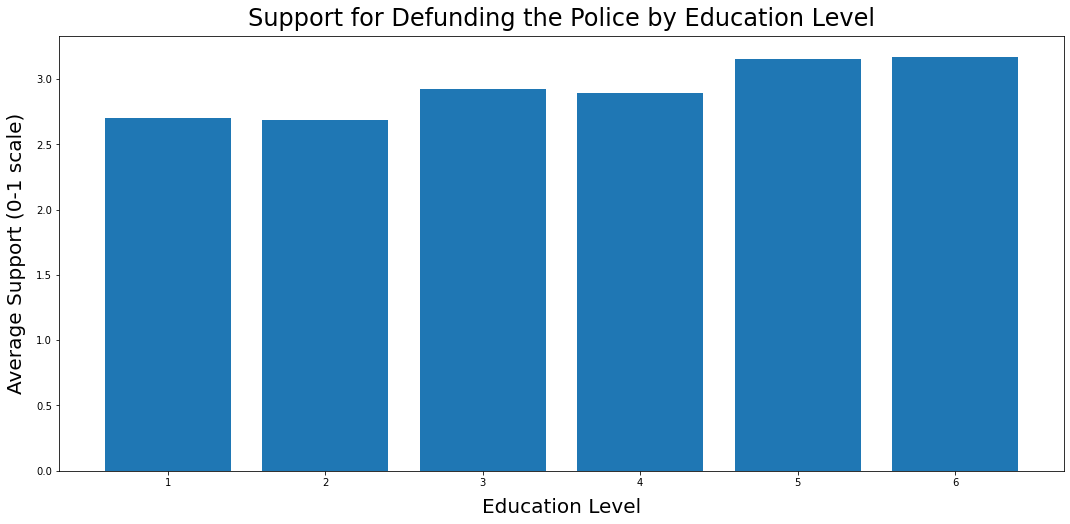

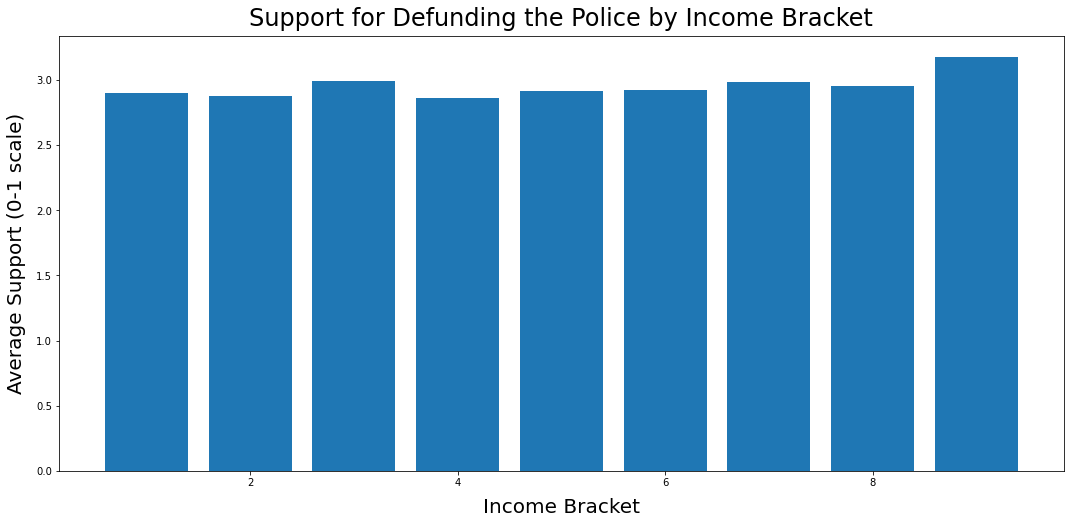

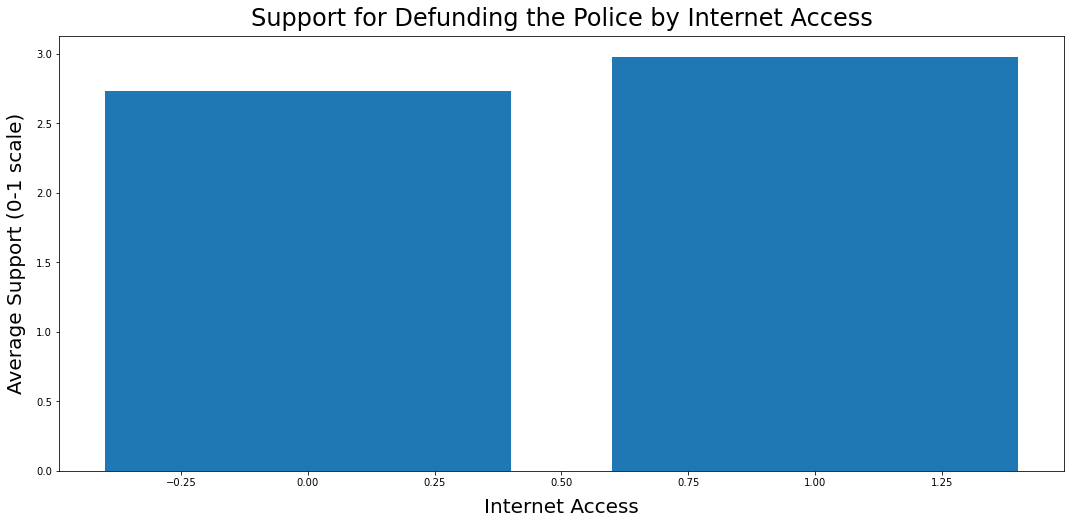

In [11]:
bar_chart_cols = ['region', 'age_group','race','religion','political_party','voter_status',
                  'education_level', 'income_bracket','internet_access']
bar_chart_names = ['Region', 'Age Group' ,'Race', 'Religion', 'Political Party', 'Voter Registration Status',
                   'Education Level', 'Income Bracket', 'Internet Access']

for col, name in zip(bar_chart_cols, bar_chart_names): 
    plt.figure(figsize = (18, 8))
    means = df.groupby(col).mean()['defund_support']
    groups = df.groupby(col).mean()['defund_support'].index
    plot_df = pd.DataFrame(means, groups)
    plot_df.sort_values('defund_support', inplace=True)
    
    plt.bar(plot_df.index,plot_df['defund_support'])
    plt.title('Support for Defunding the Police by '+name, fontsize = 24, pad = 10)
    plt.xlabel(name, fontsize = 20, labelpad = 10)
    plt.ylabel('Average Support (0-1 scale)', fontsize = 20, labelpad = 10)

## Correlations

Now that I have looked at those relationships, I'm going to dummy the columns, create a correlation heatmap, and then move on to modeling.

In [12]:
df = pd.get_dummies(df, columns = df.loc[:,df.dtypes == 'object'].columns, drop_first = True)
df.head()

,lives_in_metro_area,age_group,is_female,education_level,is_hispanic,is_citizen,relig_activity,income_bracket,internet_access,defund_support,...,religion_other,religion_protestant,political_party_dem,political_party_gop,political_party_ind,voter_status_not_registered,voter_status_prob_registered,voter_status_registered,others_reaction_to_mask_disapprove,others_reaction_to_mask_not_care
0,1,4.0,0.0,5.0,0.0,1.0,5.0,6.0,1,3.0,...,0,0,0,1,0,0,0,1,0,0
1,1,3.0,1.0,4.0,0.0,1.0,3.0,4.0,1,1.0,...,0,1,0,0,1,0,0,1,0,1
2,1,2.0,0.0,6.0,0.0,1.0,5.0,7.0,0,2.0,...,0,0,0,0,1,1,0,0,0,0
3,1,3.0,0.0,3.0,1.0,1.0,6.0,6.0,1,5.0,...,0,0,0,1,0,0,0,1,0,0
5,1,3.0,0.0,5.0,0.0,1.0,5.0,9.0,1,3.0,...,0,0,0,0,1,0,0,1,0,0


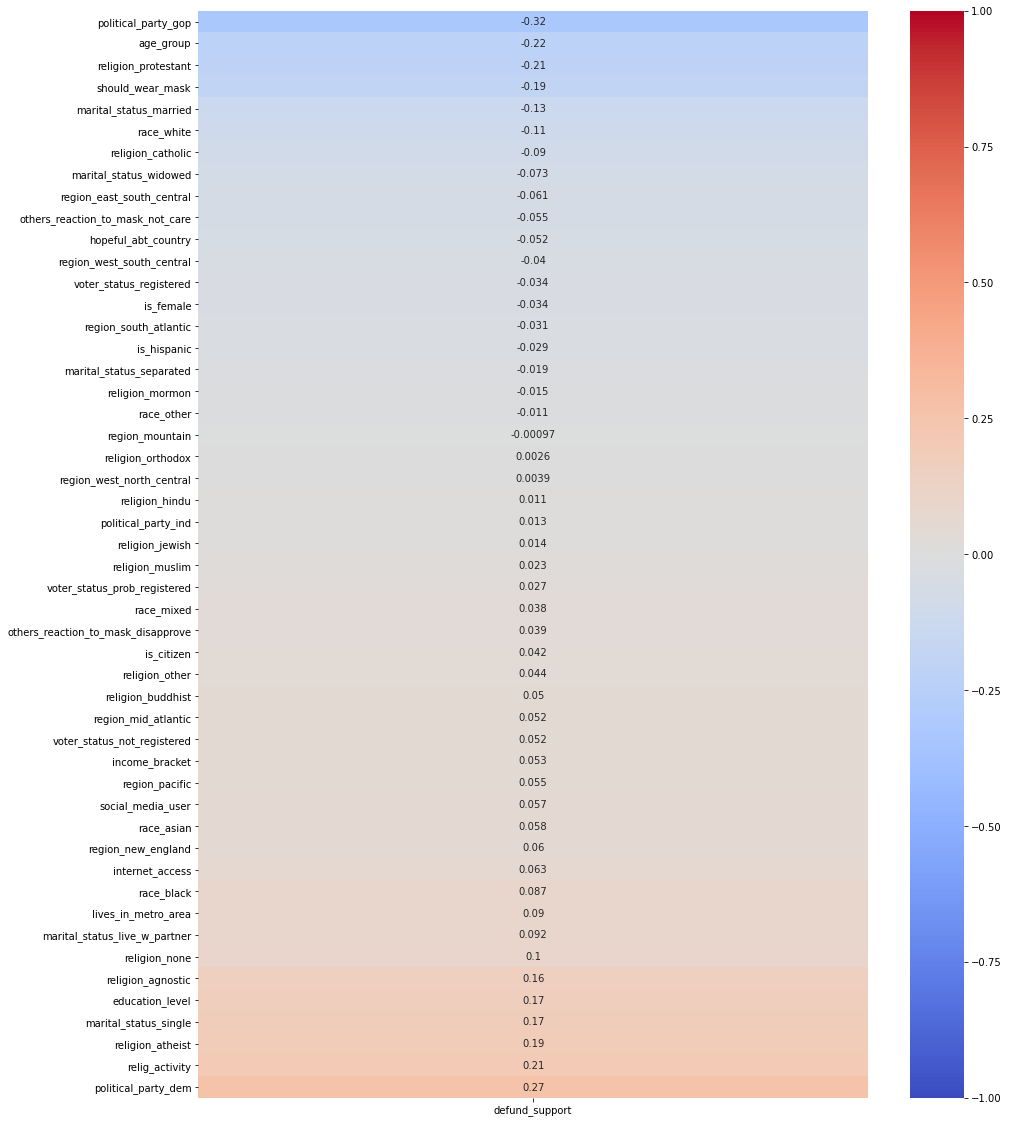

In [13]:
plt.figure(figsize = (15,20))
sns.heatmap(df.corr()[['defund_support']].sort_values('defund_support')[:-1],
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm');

# Final column selection and export

Just to make sure I'm getting everything I want and nothing that I don't, I made a list of the columns I want to pass on to the modeling stage below and exported them to a CSV.

In [14]:
final_cols = ['defund_support','lives_in_metro_area', 'is_female', 'education_level', 'is_hispanic',
              'is_citizen','relig_activity','income_bracket', 'internet_access', 'social_media_user',
              'region_east_south_central','region_mid_atlantic', 'region_mountain',
              'region_new_england', 'region_pacific','region_south_atlantic',
              'region_west_north_central','region_west_south_central', 'age_group', 'race_asian', 'race_black','race_mixed',
              'race_other', 'race_white','marital_status_live_w_partner', 'marital_status_married',
              'marital_status_separated', 'marital_status_single','marital_status_widowed', 'religion_agnostic',
              'religion_atheist','religion_buddhist', 'religion_catholic', 'religion_hindu','religion_jewish',
              'religion_mormon', 'religion_muslim','religion_none', 'religion_orthodox', 'religion_other',
              'religion_protestant','political_party_dem', 'political_party_gop', 'political_party_ind',
              'voter_status_not_registered','voter_status_prob_registered', 'voter_status_registered']

df = df.loc[:,final_cols]

In [15]:
df.to_csv('../data/pew_cleaned.csv', index = False)